In [738]:
import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [739]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

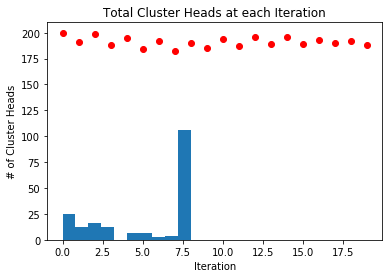

In [740]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [741]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))
    
fig = plt.figure()
hist = plt.hist(data[0])

In [742]:
num =0
animation = animation.FuncAnimation(fig, update_hist, 19, fargs=(num) )
HTML(animation.to_html5_video())

In [743]:
count = 0
total_nodes = 1250
print("Iteration\t\t    ClusterSize Freq\t\t\tNodes in Cluster\tCluster Heads\t  No Cluster")
#print("\t         \t    0   1   2   3   4   5   6   7   8")
for row in data:
    
    cluster_nodes = 0
    cluster_heads = 0
    count_array = np.bincount(row) 
    for i in range(0,len(count_array)):
        cluster_heads = cluster_heads + count_array[i]
        cluster_nodes = cluster_nodes + count_array[i]*(i+1)
    
    print("  ",count,"\t\t",np.bincount(row),"\t\t    ",cluster_nodes-cluster_heads,"\t\t  ",cluster_heads,"\t\t   ",total_nodes-cluster_nodes)
    count = count+1

Iteration		    ClusterSize Freq			Nodes in Cluster	Cluster Heads	  No Cluster
   0 		 [ 24  18  18   8  10   5   7   2 108] 		     1063 		   200 		    -13
   1 		 [ 22  12  14  11   8   8   5   3 108] 		     1060 		   191 		    -1
   2 		 [ 23  17  19   9   7   9   5   2 108] 		     1063 		   199 		    -12
   3 		 [ 21   9  13  12   6  11   6   3 107] 		     1063 		   188 		    -1
   4 		 [ 22  16  13  11   7  10   6   3 107] 		     1066 		   195 		    -11
   5 		 [ 21   6  12  11   6   9   5   7 107] 		     1067 		   184 		    -1
   6 		 [ 18  15  17  10   7   8   5   4 108] 		     1069 		   192 		    -11
   7 		 [ 15  10  14  10   6   7   6   6 108] 		     1069 		   182 		    -1
   8 		 [ 18  14  15  10   7   7   7   5 107] 		     1070 		   190 		    -10
   9 		 [ 19  11  13  10   6   5   6   6 109] 		     1066 		   185 		    -1
   10 		 [ 22  15  16   9   7   7   5   5 108] 		     1066 		   194 		    -10
   11 		 [ 18  14  13  10   6   8   5   4 109] 		     1064 		   187 		    -1
  